<a href="https://colab.research.google.com/github/LuigipDoria/Certi/blob/main/CERTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Description: This IA classifies images in two groups: Cats and Dogs.
For this challenge the IA will be a convolutional neural network, and I will use TensorFlow together with Keras to solve the problem.

OBS: The code will open all the pickles used to run the original test. If you don't want to load these pickles skip these cells.

In [ ]:
# Import libraries
import cv2
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import random
from skimage.transform  import resize
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from zipfile import ZipFile
plt.style.use("fivethirtyeight")

IMG_SIZE = 50

In this dataset we have two groups, cats and dogs. And between these two groups we have several differences, so the color of the image isn't so important. For that reason, the Neural Network will work with the grayscale images.


Done


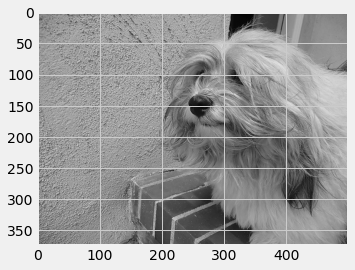

In [ ]:
# Upload the images to test the Neural Network
upload = files.upload()

# Upload the following files:
# Images.zip    # This one probaly will take some time
# Pickles.zip
# Image_test.zip

file_name = "/content/Images.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

# Try to Load the data and show the image

data_path = "/content/images" 

# Show the first image
for image in os.listdir(data_path):
  img_array = cv2.imread(os.path.join(data_path, image), cv2.IMREAD_GRAYSCALE)
  plt.imshow(img_array, cmap="gray")
  plt.show()
  break


The first problem is that the images have different width and height. Because of these, all the images need to be transformed into images with 50 x 50 pixels.

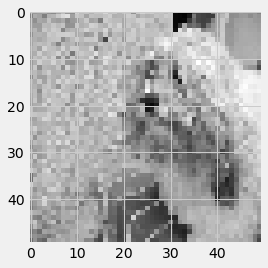

In [ ]:
# Resize the images and show the image

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

Now is almost possible to create the training data, however it's still missing the label of the images. To create this list is necessary to look the first letter of the file, because in the dataset's instruction, it is said: "All images with 1st letter as captial are cat images while images with small first letter are dog images."

The label of Dog images is equal 0 and Cat images is equal 1.


In [ ]:
# Create the training data and see the length of data set 

training_data = []

def create_training_data():
  for image in os.listdir(data_path):
    try: # Here I use try and excpet because some images can be broken
      img_array = cv2.imread(os.path.join(data_path, image), cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      if image[0].isupper(): # if the first letter is a capital letter, add number 1 to label list
        label = [1]
      else:
        label = [0]    # if the first letter isn't a capital letter, add number 0 to label list
      training_data.append([new_array, label])
    except Exception as e:
      pass

create_training_data()

print(len(training_data))

7384


It's possible to create some pickles with the necessary information, so there is no need to create the training data and the other variables every time I try to use the Nerual Network.


In [ ]:
# Create the pickle with the training data

with open('/content/training_data.pickle', "wb") as file:
  pickle.dump(training_data, file)

In [ ]:
# Open the Pickles.zip

file_name = "/content/Pickles.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
# Open the pickle with training data

pickle_in = open("/content/Pickles/training_data.pickle", "rb")
training_data = pickle.load(pickle_in)

In [ ]:
print(len(training_data))

7384


To feed a Neural Network well, is very convenient if the dataset is shuffled, have 2 lists for input: One for the images array and other with the label of the image and the image array is normalized. Otherwise the neural network doesn't understand the differences between cats and dogs

In [ ]:
# Shuffle the dataset

random.shuffle(training_data)

In [ ]:
# Split the dataset in x_train (images) and y_train (labels)

x_train = []
y_train = []

for image_array, label in training_data:
  x_train.append(image_array/255) # normalizing the data. 255 is the max value of each pixel data
  y_train.append(label)

In [ ]:
# Create pickle

with open('/content/x_train.pickle', "wb") as file:
  pickle.dump(x_train, file)

with open('/content/y_train.pickle', "wb") as file:
  pickle.dump(y_train, file)

In [ ]:
# Read the pickle

pickle_in = open("/content/Pickles/x_train.pickle", "rb")
x_train = pickle.load(pickle_in)

pickle_in = open("/content/Pickles/y_train.pickle", "rb")
y_train = pickle.load(pickle_in)

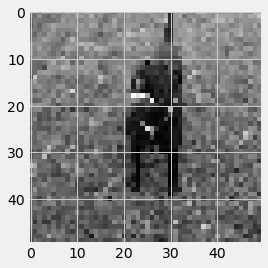

The image label is: Dog



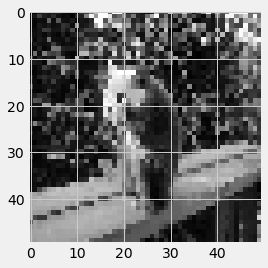

The image label is: Cat



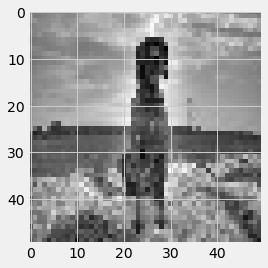

The image label is: Dog



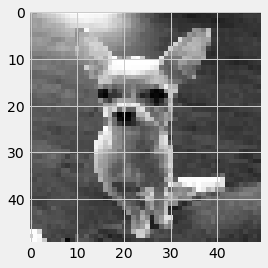

The image label is: Dog



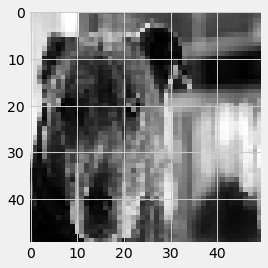

The image label is: Dog



In [ ]:
# Get the image label

classification = ["Dog", "Cat"]

for index in range(5):
  plt.imshow(x_train[index], cmap = "gray")
  plt.show()
  print("The image label is:", classification[y_train[index][0]])
  print()


The Neural Network will use "loss = categorical_crossentropy", because of this the y_train needs to be transformed into a categorical list (one_hot list). 
"(In these specific case it isn't necessary because the dataset has only 2 groups, but if the dataset has more than 2 groups, the conversion is necessary)"

In [ ]:
# Convert the labels into a one hot list to place in the Neural Network
y_train_one_hot = to_categorical(y_train)
print(y_train_one_hot)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


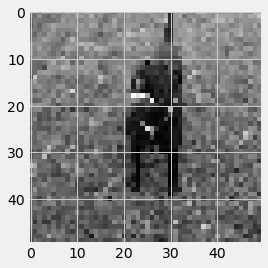

The image label is: [1. 0.]



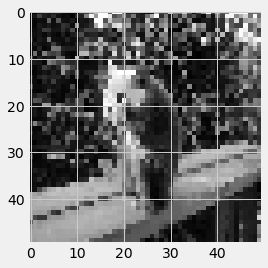

The image label is: [0. 1.]



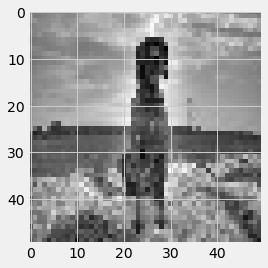

The image label is: [1. 0.]



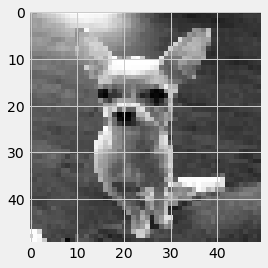

The image label is: [1. 0.]



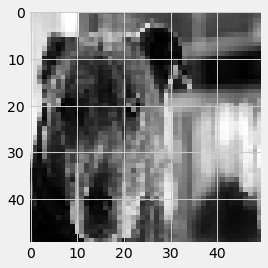

The image label is: [1. 0.]



In [ ]:
# Print the new label of the image
for index in range(5):
  plt.imshow(x_train[index], cmap = "gray")
  plt.show()
  print("The image label is:", y_train_one_hot[index])
  print()

In [ ]:
# Creating the pickle

with open('/content/y_train_one_hot.pickle', "wb") as file:
  pickle.dump(y_train_one_hot, file)

In [ ]:
# Reading the pickle

pickle_in = open("/content/Pickles/y_train_one_hot.pickle", "rb")
y_train_one_hot = pickle.load(pickle_in)

The input of Neural Network needs to be a numpy array, for that reason it's necessary to convert the x_train list to numpy array.





In [ ]:
# Convert the x_train list to a numpy array

x_train_np = np.array(x_train)

Now with the shuffled dataset, the answers and the pickles (the pickle isn't necessary to feed Neural Network, but it's very helpful), it's possible to feed the Neural Network

In [ ]:
# Create the Neural Network
classification = ["cat", "dog"]

model = Sequential()

model.add(Conv2D(64, (2,2), input_shape=(IMG_SIZE, IMG_SIZE, 1))) # First layer
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (2,2))) # Second layer -> Hidden layer
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # Third layer -> hidden layer
model.add(Dense(64))
model.add(Activation("relu"))


# Add a layer with 2 neurons # Last layer -> output layer
model.add(Dense(2, activation="softmax"))

model.compile(
              loss = "categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

hist = model.fit(x_train_np, y_train_one_hot, 
        batch_size=5, 
        epochs=15, 
        validation_split=0.2)

Epoch 1/15
1182/1182 [==============================] - 28s 23ms/step - loss: 0.5930 - accuracy: 0.6856 - val_loss: 0.5840 - val_accuracy: 0.6953
Epoch 2/15
1182/1182 [==============================] - 27s 23ms/step - loss: 0.5294 - accuracy: 0.7307 - val_loss: 0.5194 - val_accuracy: 0.7346
Epoch 3/15
1182/1182 [==============================] - 28s 24ms/step - loss: 0.4791 - accuracy: 0.7689 - val_loss: 0.5006 - val_accuracy: 0.7488
Epoch 4/15
1182/1182 [==============================] - 27s 23ms/step - loss: 0.4291 - accuracy: 0.8016 - val_loss: 0.5045 - val_accuracy: 0.7691
Epoch 5/15
1182/1182 [==============================] - 27s 23ms/step - loss: 0.3821 - accuracy: 0.8250 - val_loss: 0.5038 - val_accuracy: 0.7549
Epoch 6/15
1182/1182 [==============================] - 27s 23ms/step - loss: 0.3349 - accuracy: 0.8507 - val_loss: 0.5338 - val_accuracy: 0.7448
Epoch 7/15
1182/1182 [==============================] - 27s 23ms/step - loss: 0.2880 - accuracy: 0.8778 - val_loss: 0.5529 -

In [ ]:
# Create the pickle for the model and the hist

with open('/content/model.pickle', "wb") as file:
  pickle.dump(model, file)

with open('/content/hist.pickle', "wb") as file:
  pickle.dump(hist, file)


INFO:tensorflow:Assets written to: ram://29779478-cccb-4378-b63d-d7e6c85cc903/assets
INFO:tensorflow:Assets written to: ram://2e84903d-a965-4858-9c6d-26ecc3f80e30/assets


In [ ]:
# Open the pickles

pickle_in = open("/content/Pickles/model.pickle", "rb") 
model = pickle.load(pickle_in)

pickle_in = open("/content/Pickles/hist.pickle", "rb")
hist = pickle.load(pickle_in)

To evaluate the model it is necessary to remove all the images used in the training process. In order to remove these elements from both lists: x_train and y_train

In [ ]:
# Evaluate the model

for _ in range(1183): # 1183 is the number of images in the epoch plus + 1
  x_train.pop(0)
  y_train.pop(0)

# Convert the list in numpy array and in one hot list
x_train = np.array(x_train)
y_train_one_hot = to_categorical(y_train)

model.evaluate(x_train, y_train_one_hot, batch_size=1)[1]


6201/6201 [==============================] - 16s 3ms/step - loss: 0.3933 - accuracy: 0.9436


0.9435575008392334

With the Neural Network trained, it's is possible to extract valuable information

In [ ]:
# Create a grapich comparing the accuracy and the validation accuracy according to the epoch

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', "Val"], loc= 'upper left')
plt.show()

With the Neural Network trained, let's test it with random images.

In [ ]:
# Upload the images to test the Neural Network

file_name = "/content/Image_test.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

In [ ]:
# Test the Neural Network with diferents images

classification = ["cat", "dog"]

for animal in classification:
  for i in range(1,11):
    print("{} {} ->".format(animal, i), end=" ")
    new_image = cv2.imread(os.path.join("/content/Image_test/{}_test_{}.jfif".format(animal, i)), cv2.IMREAD_GRAYSCALE)
    new_image = new_image /255
    resized_image = resize(new_image, (IMG_SIZE,IMG_SIZE))
    predictions = model.predict(np.array([resized_image]))
    print("IA prediction: {}% chance to be a dog and {}% chance to be a cat.".format(round(predictions[0][0]*100, 2), round(predictions[0][1]*100,2)))
  print()


cat 1 -> IA prediction: 0.19% chance to be a dog and 99.81% chance to be a cat.
cat 2 -> IA prediction: 0.12% chance to be a dog and 99.88% chance to be a cat.
cat 3 -> IA prediction: 0.03% chance to be a dog and 99.97% chance to be a cat.
cat 4 -> IA prediction: 2.43% chance to be a dog and 97.57% chance to be a cat.
cat 5 -> IA prediction: 2.48% chance to be a dog and 97.52% chance to be a cat.
cat 6 -> IA prediction: 0.51% chance to be a dog and 99.49% chance to be a cat.
cat 7 -> IA prediction: 11.65% chance to be a dog and 88.35% chance to be a cat.
cat 8 -> IA prediction: 5.25% chance to be a dog and 94.75% chance to be a cat.
cat 9 -> IA prediction: 0.46% chance to be a dog and 99.54% chance to be a cat.
cat 10 -> IA prediction: 0.0% chance to be a dog and 100.0% chance to be a cat.

dog 1 -> IA prediction: 99.98% chance to be a dog and 0.02% chance to be a cat.
dog 2 -> IA prediction: 65.35% chance to be a dog and 34.65% chance to be a cat.
dog 3 -> IA prediction: 86.02% chance

Cat or Dog?Cat
Number of the image (1 to 10): 9
IA prediction: 0.0% chance to be a dog and 100.0% chance to be a cat.


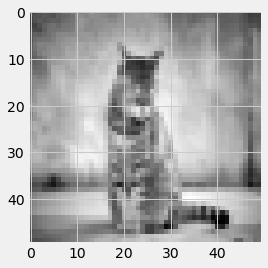

In [ ]:
# Test a specific image

animal = input("Cat or Dog? ")
number = input("Number of the image (1 to 10): ")
animal = animal.lower()

new_image = cv2.imread(os.path.join("/content/Image_test/{}_test_{}.jfif".format(animal, i)), cv2.IMREAD_GRAYSCALE)
new_image = new_image /255
img = plt.imshow(new_image, cmap = "gray")

# resize the image

resized_image = resize(new_image, (IMG_SIZE,IMG_SIZE))
img = plt.imshow(resized_image, cmap = "gray") 

# Get the model prediction
predictions = model.predict(np.array([resized_image]))
print("IA prediction: {}% chance to be a dog and {}% chance to be a cat.".format(round(predictions[0][0]*100, 2), round(predictions[0][1]*100,2)))